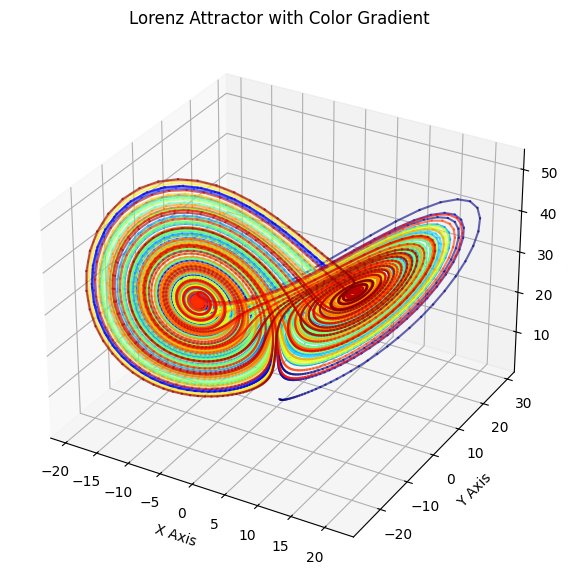

In [2]:
# import numpy as np
import array_api_strict as np
import matplotlib.pyplot as plt
# chaotic solution 
# σ is the Prandtl number representing the ratio of the fluid viscosity to its thermal conductivity
# ρ represents the difference in temperature between the top and bottom of the system
# β is the ratio of the width to height of the box used to hold the system
σ, ρ, β = 10, 28, 8 / 3


dt = 0.01  # sample rate in seconds.
x = 20000

dxdt = np.empty(x + 1) 
dydt = np.empty(x + 1)
dzdt = np.empty(x + 1)

# Initial values
dxdt[0], dydt[0], dzdt[0] = (0.0, 1.0, 1.05)
# For data parallel you need initial conditions, and expand on it
for i in range(x):
    dxdt[i + 1] = dxdt[i] + σ * (dydt[i] - dxdt[i]) * dt # P(y-x)
    dydt[i + 1] = dydt[i] + (dxdt[i] * (ρ - dzdt[i]) - dydt[i]) * dt # Rx - y - xz
    dzdt[i + 1] = dzdt[i] + (dxdt[i] * dydt[i] - β * dzdt[i]) * dt # xy - Bz

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a color gradient based on the iteration
# Increase order of differentiator (second order), look it up, form RHS in a system
# For euler you need smaller threshold, runge-kutta is different for same accuracy
colors = plt.cm.jet(np.linspace(0, 1, x + 1))

# Plot with color gradient
for i in range(x):
    xG = list(dxdt[i:i+2])
    yG = list(dydt[i:i+2])
    zG = list(dzdt[i:i+2])
    colorsG = list(colors[i])
    ax.plot(xG, yG, zG, color=colorsG, alpha=0.6)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor with Color Gradient")

plt.show()

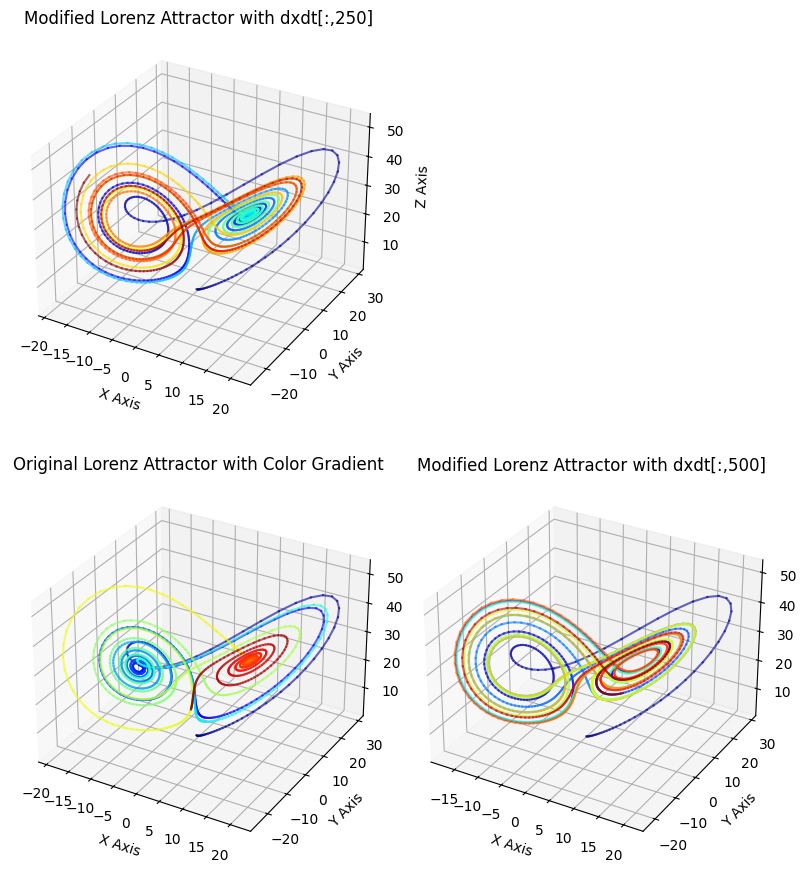

In [20]:
# import numpy as np
import array_api_strict as np
import matplotlib.pyplot as plt
# chaotic solution 
# σ is the Prandtl number representing the ratio of the fluid viscosity to its thermal conductivity
# ρ represents the difference in temperature between the top and bottom of the system
# β is the ratio of the width to height of the box used to hold the system
σ, ρ, β = 10, 28, 8 / 3


dt = 0.01  # sample rate in seconds.
x = 2000
init_conds = 1000

dxdt = np.empty((x + 1, init_conds)) # add in dimension for empty
dydt = np.empty((x + 1, init_conds))
dzdt = np.empty((x + 1, init_conds))

# Initial values
dxdt[0, :], dydt[0, :], dzdt[0, :] = (0.0, 1.0, 1.05)

# permute initial conditions with small offset
dxdt[0, :] += np.asarray(np.arange(0, init_conds, 1), dtype=np.float32) * np.asarray(0.001)
dydt[0, :] += np.asarray(np.arange(0, init_conds, 1), dtype=np.float32)* np.asarray(0.001) 
dzdt[0, :] += np.asarray(np.arange(0, init_conds, 1), dtype=np.float32)* np.asarray(0.001) 

# For data parallel you need initial conditions, and expand on it
for i in range(x):
    dxdt[i + 1, :] = dxdt[i, :] + σ * (dydt[i, :] - dxdt[i, :]) * dt # P(y-x)
    dydt[i + 1, :] = dydt[i, :] + (dxdt[i, :] * (ρ - dzdt[i, :]) - dydt[i, :]) * dt # Rx - y - xz
    dzdt[i + 1, :] = dzdt[i, :] + (dxdt[i, :] * dydt[i, :] - β * dzdt[i, :]) * dt # xy - Bz

# Plotting
fig = plt.figure(figsize=(8, 18))
# Create a color gradient based on the iteration
# Increase order of differentiator (second order), look it up, form RHS in a system
# For euler you need smaller threshold, runge-kutta is different for same accuracy
colors = plt.cm.jet(np.linspace(0, 1, x + 1))

# Plot with color gradient
ax1 = fig.add_subplot(121, projection='3d')
for i in range(x - 1):
    xG = list(dxdt[i:i+2, 0])
    yG = list(dydt[i:i+2, 0])
    zG = list(dzdt[i:i+2, 0])
    colorsG = list(colors[i])
    ax1.plot(xG, yG, zG, color=colorsG, alpha=0.6)

ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax1.set_title("Original Lorenz Attractor with Color Gradient")

# Second subplot with dxdt[i:i+2, 1]
ax2 = fig.add_subplot(122, projection='3d')
for i in range(x - 1):
    xG = list(dxdt[i:i+2, 500])  # Using second column for x-axis
    yG = list(dydt[i:i+2, 500])  # Keeping first column for y-axis
    zG = list(dzdt[i:i+2, 500])  # Keeping first column for z-axis
    colorsG = list(colors[i])
    ax2.plot(xG, yG, zG, color=colorsG, alpha=0.6)

ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
ax2.set_title("Modified Lorenz Attractor with dxdt[:,500]")

# Second subplot with dxdt[i:i+2, 1]
ax2 = fig.add_subplot(221, projection='3d')
for i in range(x - 1):
    xG = list(dxdt[i:i+2, 250])  # Using second column for x-axis
    yG = list(dydt[i:i+2, 250])  # Keeping first column for y-axis
    zG = list(dzdt[i:i+2, 250])  # Keeping first column for z-axis
    colorsG = list(colors[i])
    ax2.plot(xG, yG, zG, color=colorsG, alpha=0.6)

ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
ax2.set_title("Modified Lorenz Attractor with dxdt[:,250]")

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
!python -m pip install --upgrade matplotlib

AttributeError: 'list' object has no attribute 'set_data'

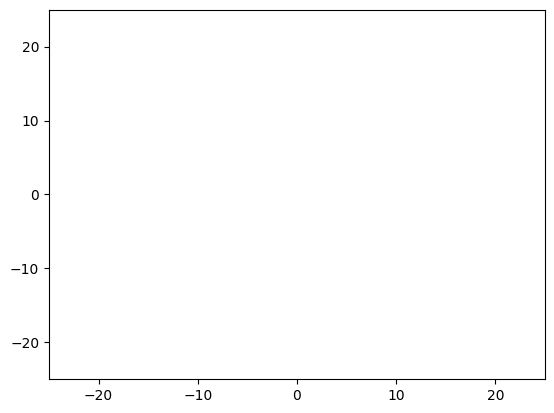

In [30]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# creating a blank window 
# for the animation  
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

fig = plt.figure()  
colors = plt.cm.jet(np.linspace(0, 1, x + 1))
axis = plt.axes(xlim =(-25, 25), 
                ylim =(-25, 25))  
  
line = axis.plot([], [], [], lw = 2, color=colorsG, alpha=0.6)  

# initializing empty values 
# for x and y co-ordinates 
xdata, ydata, zdata = [], [], []

# Animation function which updates plot
def animate(i):
    line.set_data(dxdt[:i], dydt[:i])
    line.set_3d_properties(dzdt[:i])
    line.set_color(colors[i])
    return line,

# Creating the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=10, blit=True)
   
# saves the animation in our desktop 
anim.save('lorenz.mp4', writer = 'ffmpeg', fps = 15) 

In [33]:
!python -m pip install plotly

ERROR: Could not find a version that satisfies the requirement plotly (from versions: none)
ERROR: No matching distribution found for plotly


In [31]:
import plotly.graph_objects as go

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()

ModuleNotFoundError: No module named 'plotly'